# Week 5 Lab: Supervised Learning

<img align="right" style="padding-right:10px;" src="figures_wk5/knn.png" width=300><br>

This week's assignment will focus completeing a KNN analysis and comparing its performance with other supervised algorithms.


## Our Dataset: 
**Dataset:** bank-additional-full.csv (Provided in folder assign_wk5)

Remember to take a look at the bank-additional-names.txt files for a better understanding of the dataset.


# Assignment Requirements

## Part 1: KNN Analysis
**Objective:** According to the dataset's text file, the target column the last column in the dataset.
   - Cleanup the dataset as you deem appropriate. As always, defend your reasoning!!!
       - Missing values?
       - Column names
   - Prepare the data for machine learning
       - A little EDA goeas a long way
       - Do you need to do anything about data types?
   - KNN analysis
       - What is your objective from the analysis?
       - What is your optimal K? 
       - How about accuracy rate? 
    - Discover any insights from this analysis? 
       - Include numbers/graphs corresponding to your conclusions
       - Discuss ways to improve the performance of your KNN model 
       - Defend and backup your thoughts!!!!!!

In [1]:
#importing libraries from FTE example
import pandas as pd
# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the data - discovered the file used semicolons instead of commas for separators
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
#convert categorical variables to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']
for i in cols:
    df[i] = le.fit_transform(df[i].astype('str'))

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [40]:
df.shape

(41188, 21)

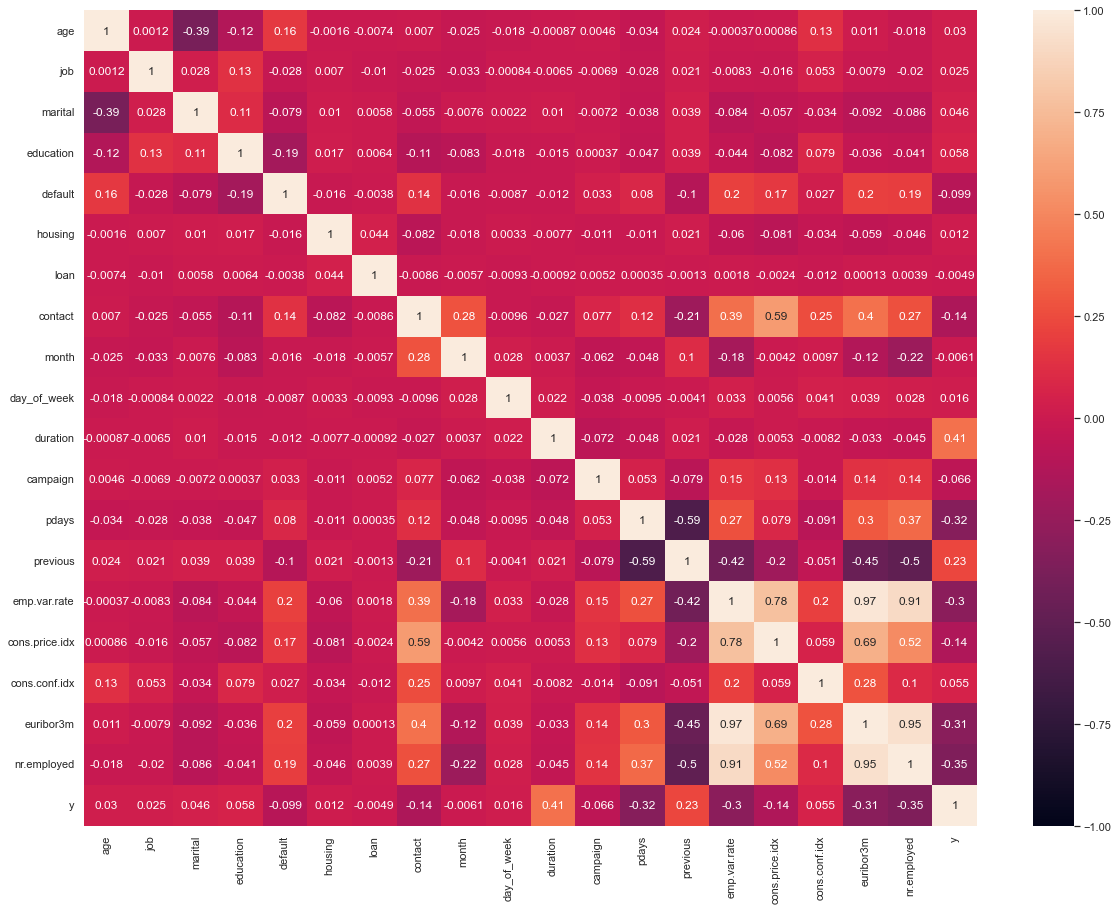

In [34]:
plt.figure(figsize=(20, 15))
_ = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [55]:
#creating a smaller dataframe with only the features that have correlation with the target > .25 (or < -.25)
df_trimmed = df[['nr.employed', 'euribor3m', 'emp.var.rate', 'pdays', 'duration', 'y']]
df_trimmed.head()

,nr.employed,euribor3m,emp.var.rate,pdays,duration,y
0,5191.0,4.857,1.1,999,261,0
1,5191.0,4.857,1.1,999,149,0
2,5191.0,4.857,1.1,999,226,0
3,5191.0,4.857,1.1,999,151,0
4,5191.0,4.857,1.1,999,307,0


In [39]:
df_trimmed.shape

(41188, 6)

In [41]:
#setting up target and feature columns
cols = df_trimmed.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

array = df_trimmed.values

X = array[:, 1:5]
y = array[:, 0]

In [42]:
#setting up train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# define and fit the model
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

In [46]:
# getting r2 score and variance score
preds = model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.9304419714687149


In [48]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

0.9311274144295993


My goal was to build a model that predicts whether or not a bank client will purchase a term deposit. The first attempt, using 3 as our k-value for clusters, was very successful with an R-square value of .93, but I'm going to take a look at how other k-values might compare in case we can improve the model a bit further.

In [49]:
#evaluating other k-values to determine optimal K
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

for k in range(2, 10):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['nr.employed', 'euribor3m', 'emp.var.rate', 'pdays', 'duration'] 
Target: y
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters


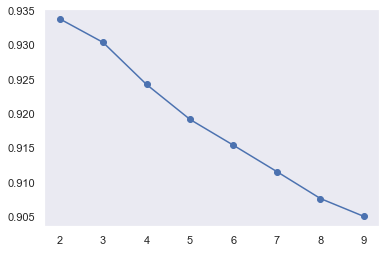

In [50]:
plt.plot(range(2, 10), scores)
plt.scatter(range(2, 10), scores)
plt.grid()
_ =plt.xticks(range(2, 10))

As it turns out, 2 clusters appears to give us an even better model score, though only by 0.05. I will try re-running the model with a K of 2 and look at the difference in values.

In [51]:
model = KNeighborsRegressor(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(r2_score(y_test,preds))

0.9338868438482077


In [52]:
print(explained_variance_score(y_test,preds))

0.9342532314555922


The R-squared value only went from .930 to .933. While that is a very small improvement in performance, a smaller number of clusters means a simpler, and potentially more efficient, model, so I would choose the K of 2 in this case. 
## Part 2: Comparison to other supervised algorithm
As we saw in the lecture notebook, algorithm performance varies based on the algorithm used. The lecture demostrated using K-Fold Cross-Validation to compare the performance of several algorithm for the same dataset. 
   - At the end of part 1 you discussed ways to improve the performance of you KNN model. 
       - Implement one of those methods to improve your KNN model performance.
       - Rerun a KNN analysis for your improved dataset
       - Discuss the change in performance from the model in part 1
What is interesting about my initial model is the predictors are almost all outside economic indicators, like the European bank rate, employment variation, and number of employees. The two individual indicators are pdays and duration. Referring back to the text document that provides info on the data set, duration should not be used if one is trying to create a realistic model, so I'm going to try running the model again with that column removed and see the impact.

In [56]:
df_trimmed.drop(['duration'],axis=1, inplace=True)
df_trimmed.head()

,nr.employed,euribor3m,emp.var.rate,pdays,y
0,5191.0,4.857,1.1,999,0
1,5191.0,4.857,1.1,999,0
2,5191.0,4.857,1.1,999,0
3,5191.0,4.857,1.1,999,0
4,5191.0,4.857,1.1,999,0


In [57]:
cols = df_trimmed.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

array = df_trimmed.values

X = array[:, 1:5]
y = array[:, 0]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsRegressor(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(r2_score(y_test,preds))

0.998979234086078


Dropping the duration column improved the R-squared value to near-perfect at .999. So the good news is, removing that feature made the model better, but now the model largely tells us that outside economic indicators have the biggest impact on whether or not someone will purchase a term deposit...which is largely outside the bank's control. The only piece within their control is pdays, so basically if they haven't contacted a customer or it's been a really long time, they should give it a try, particularly when the economic indicators are favorable.

   - Complete a K-fold cross-validation analysis for your improved model
       - You need to use at less three additional models
       - Discuss the difference in the performance of the 4 algorithms against your improved dataset.

In [59]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [60]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [61]:
# evaluating each model. I'm choosing 10 folds because this is a larger dataset
seed = 42
num_folds = 10
scoring = 'neg_mean_squared_error'

In [62]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -488.878497 (18.904840)
LASSO: -510.077900 (23.350238)
EN: -611.607659 (38.180008)
KNN: -9.991588 (4.245631)
CART: -0.023080 (0.046161)
SVR: -190.899926 (16.825937)


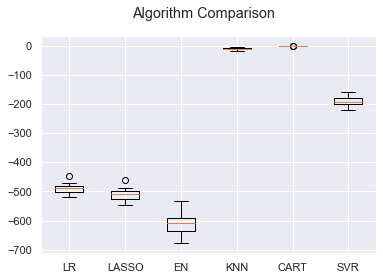

In [64]:
#visualizing the results (although it's pretty clear from glancing at the numbers that there are only two that are even close)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [67]:
#using pycaret/automl to do some additional comparisons
!conda install -c conda-forge pycaret -y

Solving environment: done

## Package Plan ##

  environment location: /Users/mafphd/opt/anaconda3

  added / updated specs:
    - pycaret


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39h6e9494a_2         962 KB  conda-forge
    openssl-1.1.1s             |       hfd90126_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  conda                               22.9.0-py39h6e9494a_1 --> 22.9.0-py39h6e9494a_2 None
  openssl                                 1.1.1q-hfe4f2af_0 --> 1.1.1s-hfd90126_0 None



conda-22.9.0         | 962 KB    | ##################################### | 100% 
openssl-1.1.1s       | 1.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transa

In [68]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model

In [69]:
automl = setup(df_trimmed, target = 'y')

,Description,Value
0,session_id,2832
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(41188, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [70]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9005,0.7868,0.2144,0.6733,0.3250,0.2866,0.3422,0.0780
gbc,Gradient Boosting Classifier,0.9005,0.7945,0.2138,0.6739,0.3242,0.2859,0.3418,0.1510
lightgbm,Light Gradient Boosting Machine,0.8996,0.7954,0.2470,0.6309,0.3545,0.3113,0.3522,0.7330
xgboost,Extreme Gradient Boosting,0.8990,0.7927,0.2451,0.6229,0.3515,0.3079,0.3478,0.6510
ridge,Ridge Classifier,0.8989,0.0000,0.2110,0.6481,0.3181,0.2785,0.3306,0.0080
lr,Logistic Regression,0.8988,0.7469,0.2110,0.6468,0.3179,0.2783,0.3301,0.3940
catboost,CatBoost Classifier,0.8985,0.7953,0.2352,0.6223,0.3410,0.2980,0.3400,1.3390
rf,Random Forest Classifier,0.8983,0.7810,0.2525,0.6117,0.3571,0.3121,0.3486,0.1680
et,Extra Trees Classifier,0.8977,0.7634,0.2268,0.6185,0.3316,0.2888,0.3321,0.1360
dt,Decision Tree Classifier,0.8974,0.7493,0.2219,0.6169,0.3261,0.2837,0.3278,0.0100


The decision tree regressor actually performed slightly better in the K-fold cross validation with a Mean Squared Error very close to zero. I decided to try using automl to compare some additional models and metrics, and despite its good R-squared values initially, the KNN classifier was not a leader in any of the model metrics shown above (although only .01 off of the highest accuracy scores). In the grand scheme of things, based on this chart I would choose either the Ada Boost Classifier or the Naive Bayes model. Naive Bayes had the best scores for 4/7 metrics and was extremely fast at 0.01 seconds, but you are sacrificing roughly .03 in accuracy. If that translates to minimal actual impact in production, it would be the best overall choice. However, if every bit of accuracy was most important, Ada Boost Classifier would be the way to go, as it has highest accuracy, precision almost identical to the top performer (GBC) in that category, and is roughly twice as fast as GBC.

# Deliverables:


Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.